In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark = (SparkSession.builder.appName("")\
.config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
.enableHiveSupport().getOrCreate())

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# EXPLORATORY DATA ANALYSIS

In [4]:
spark.sql('use db_kushi').show()

++
||
++
++



In [5]:
spark.sql("show tables").show()

+--------+------------+-----------+
|database|   tableName|isTemporary|
+--------+------------+-----------+
|db_kushi| departments|      false|
|db_kushi|    dept_emp|      false|
|db_kushi|dept_manager|      false|
|db_kushi|   employees|      false|
|db_kushi|    salaries|      false|
|db_kushi|      titles|      false|
+--------+------------+-----------+



In [6]:
departments = spark.sql("select * from db_kushi.departments")
departments.show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|   Human Resources|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
+-------+------------------+



In [7]:
employees = spark.sql("select * from db_kushi.employees")
employees.show()

+------+------------+----------+----------+-----------+---+----------+--------------+-----------------------+-----+----------+
|emp_no|emp_title_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|Last_performance_rating|left_| last_date|
+------+------------+----------+----------+-----------+---+----------+--------------+-----------------------+-----+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
+------+------------+----------+----------+-----------+---+----------+--------------+-----------------------+-----+----------+
only showing top 20 rows



In [8]:
dept_emp= spark.sql("select * from db_kushi.dept_emp")
dept_emp.show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



In [9]:
dept_manager= spark.sql("select * from db_kushi.dept_manager")
dept_manager.show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [10]:
titles = spark.sql("select * from db_kushi.titles")
titles.show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
|   s0001|             Staff|
|   s0002|      Senior Staff|
+--------+------------------+



In [11]:
salaries = spark.sql("select * from db_kushi.salaries")
salaries.show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [12]:
##1 EXPLORATORY DATA ANALYSIS
##1. A list showing employee number, last name, first name, sex, and salary for each employee

spark.sql("select salaries.emp_no, employees.last_name, employees.first_name, employees.sex, salaries.salary from db_kusuma.employees inner join salaries on salaries.emp_no = employees.emp_no order by salaries.emp_no").show()


+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [13]:
##2. A list showing first name, last name, and hire date for employees who were hired in 1986.

spark.sql(" select emp_no, last_name, first_name, hire_date from employees where cast(substr(hire_date,7,4) as int) = 1986 ").show()


+------+---------+----------+----------+
|emp_no|last_name|first_name| hire_date|
+------+---------+----------+----------+
| 10081|    Rosen|  Zhongwei|10/30/1986|
| 10150|    Perng|  Zhenbing|11/16/1986|
| 10201|  Kavraki|     Idoia|11/22/1986|
| 10238|     Gire| Mototsugu|11/19/1986|
| 10268|   Siochi|    Nishit|12/17/1986|
| 10317|    Birge|      Arie|12/10/1986|
| 10361|    Sidou|     Seshu|10/23/1986|
| 10435| Tagansky|    Marsha|12/19/1986|
| 10522| Cesareni|     Marke|12/12/1986|
| 10533|Smailagic| Mohamadou|10/31/1986|
| 10701| Zolotykh| Hyuncheol|10/27/1986|
| 10807| Zallocco|  Munehiro|10/23/1986|
| 10832|  Bergere|     Hidde|10/11/1986|
| 10856|     Peck| Sreenivas|12/31/1986|
| 10962|   Kugler|    Naraig|12/16/1986|
| 10975| Birnbaum| Peternela|10/31/1986|
| 11010| Narwekar|    Jaques|12/18/1986|
| 11012|Speckmann|   Taegyun|12/28/1986|
| 11059|  Jarecki|    Shawna|11/17/1986|
| 11085|  Thummel|   Hailing|11/27/1986|
+------+---------+----------+----------+
only showing top

In [14]:
##--3. A list showing the manager of each department with the following information: department number, department name, 
##--the manager's employee number, last name, first name.

spark.sql("select distinct dept_manager.dept_no, departments.dept_name, dept_manager.emp_no, employees.last_name, employees.first_name from dept_manager inner join departments on dept_manager.dept_no= departments.dept_no inner join employees on dept_manager.emp_no = employees.emp_no order by dept_manager.dept_no").show()

+-------+------------------+------+------------+-----------+
|dept_no|         dept_name|emp_no|   last_name| first_name|
+-------+------------------+------+------------+-----------+
|   d001|         Marketing|110039|    Minakawa|   Vishwani|
|   d001|         Marketing|110022|  Markovitch|  Margareta|
|   d002|           Finance|110114|  Legleitner|      Isamu|
|   d002|           Finance|110085|       Alpin|       Ebru|
|   d003|   Human Resources|110183|Ossenbruggen|    Shirish|
|   d003|   Human Resources|110228|     Sigstam|    Karsten|
|   d004|        Production|110420|    Ghazalie|      Oscar|
|   d004|        Production|110344|       Cools|     Rosine|
|   d004|        Production|110303|     Wegerle|  Krassimir|
|   d004|        Production|110386|      Kieras|       Shem|
|   d005|       development|110567|    DasSarma|       Leon|
|   d005|       development|110511|    Hagimont|   DeForest|
|   d006|Quality Management|110765|     Hofmeyr|     Rutger|
|   d006|Quality Managem

In [15]:
##--4. A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

spark.sql("select distinct  employees.emp_no, employees.last_name, employees.first_name, departments.dept_name from employees left join dept_emp on employees.emp_no = dept_emp.emp_no inner join departments on dept_emp.dept_no = departments.dept_no order by employees.emp_no").show()



+------+-----------+----------+------------------+
|emp_no|  last_name|first_name|         dept_name|
+------+-----------+----------+------------------+
| 10001|    Facello|    Georgi|       development|
| 10002|     Simmel|   Bezalel|             Sales|
| 10003|    Bamford|     Parto|        Production|
| 10004|    Koblick| Chirstian|        Production|
| 10005|   Maliniak|   Kyoichi|   Human Resources|
| 10006|    Preusig|    Anneke|       development|
| 10007|  Zielinski|   Tzvetan|          Research|
| 10008|   Kalloufi|    Saniya|       development|
| 10009|       Peac|    Sumant|Quality Management|
| 10010|   Piveteau| Duangkaew|Quality Management|
| 10010|   Piveteau| Duangkaew|        Production|
| 10011|      Sluis|      Mary|  Customer Service|
| 10012|  Bridgland|  Patricio|       development|
| 10013|     Terkki| Eberhardt|   Human Resources|
| 10014|      Genin|     Berni|       development|
| 10015|  Nooteboom|  Guoxiang|          Research|
| 10016|Cappelletti|  Kazuhito|

In [16]:
## --5.A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.

spark.sql("select last_name, first_name from employees where (first_name = 'Hercules') and (lower(last_name) like 'b%') order by last_name").show()

+-------------+----------+
|    last_name|first_name|
+-------------+----------+
|         Baak|  Hercules|
|         Baer|  Hercules|
|         Bahr|  Hercules|
|         Bail|  Hercules|
|         Bain|  Hercules|
|   Baranowski|  Hercules|
|     Barreiro|  Hercules|
|      Basagni|  Hercules|
|     Benantar|  Hercules|
|   Benzmuller|  Hercules|
|Bernardinello|  Hercules|
|    Bernatsky|  Hercules|
|      Berstel|  Hercules|
|        Biran|  Hercules|
|        Birge|  Hercules|
|        Biron|  Hercules|
|      Bisiani|  Hercules|
|       Bodoff|  Hercules|
|      Brendel|  Hercules|
|      Buchter|  Hercules|
+-------------+----------+



In [17]:
##--6 A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.
spark.sql("select employees.emp_no, employees.last_name, employees.first_name, departments.dept_name from employees inner join dept_emp on dept_emp.emp_no = employees.emp_no inner join departments on dept_emp.dept_no= departments.dept_no where lower(departments.dept_name) = 'sales'").show()

+------+------------+----------+---------+
|emp_no|   last_name|first_name|dept_name|
+------+------------+----------+---------+
| 10002|      Simmel|   Bezalel|    Sales|
| 10016| Cappelletti|  Kazuhito|    Sales|
| 10034|        Swan|     Bader|    Sales|
| 10041|      Lenart|       Uri|    Sales|
| 10050|      Dredge|   Yinghua|    Sales|
| 10053|    Zschoche|    Sanjiv|    Sales|
| 10060| Billingsley|  Breannda|    Sales|
| 10061|      Herber|       Tse|    Sales|
| 10068|     Brattka|  Charlene|    Sales|
| 10087|     Eugenio|   Xinglin|    Sales|
| 10088|    Syrzycki|  Jungsoon|    Sales|
| 10089|Flasterstein| Sudharsan|    Sales|
| 10093|     Desikan|   Sailaja|    Sales|
| 10095|      Morton|    Hilari|    Sales|
| 10099|     Sullins|    Valter|    Sales|
| 10101|      Heyers|     Perla|    Sales|
| 10107|        Baca|      Dung|    Sales|
| 10125|     Hiltgen|     Syozo|    Sales|
| 10136|    Pintelas|    Zissis|    Sales|
| 10148|       Azumi|    Douadi|    Sales|
+------+---

In [18]:
##--7 A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

spark.sql("select employees.emp_no, employees.last_name, employees.first_name, departments.dept_name from employees inner join dept_emp on dept_emp.emp_no = employees.emp_no inner join departments on dept_emp.dept_no= departments.dept_no where (lower(departments.dept_name) = 'sales') or (lower(departments.dept_name) = 'development')").show()

+------+-----------+----------+-----------+
|emp_no|  last_name|first_name|  dept_name|
+------+-----------+----------+-----------+
| 10001|    Facello|    Georgi|development|
| 10002|     Simmel|   Bezalel|      Sales|
| 10006|    Preusig|    Anneke|development|
| 10008|   Kalloufi|    Saniya|development|
| 10012|  Bridgland|  Patricio|development|
| 10014|      Genin|     Berni|development|
| 10016|Cappelletti|  Kazuhito|      Sales|
| 10018|       Peha|  Kazuhide|development|
| 10021|       Erde|     Ramzi|development|
| 10022|     Famili|    Shahaf|development|
| 10023| Montemayor|     Bojan|development|
| 10025|     Heyers| Prasadram|development|
| 10027|    Reistad|    Divier|development|
| 10028|   Tempesti|  Domenick|development|
| 10031|     Joslin|   Karsten|development|
| 10034|       Swan|     Bader|      Sales|
| 10037|   Makrucki|   Pradeep|development|
| 10040|    Meriste|     Weiyi|development|
| 10041|     Lenart|       Uri|      Sales|
| 10043|    Tzvieli|    Yishay|d

In [19]:
##--8 A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

spark.sql("select last_name,count(last_name) as Frequency from employees group by last_name order by Frequency desc").show()

+-----------+---------+
|  last_name|Frequency|
+-----------+---------+
|       Baba|      226|
|      Coorg|      223|
|     Gelosh|      223|
|     Farris|      222|
|    Sudbeck|      222|
|     Adachi|      221|
|     Osgood|      220|
|    Mandell|      218|
|     Masada|      218|
|     Neiman|      218|
|Boudaillier|      217|
|    Wendorf|      217|
|     Pettis|      216|
|    Solares|      216|
|   Cummings|      216|
|     Mahnke|      216|
|   Collette|      215|
|     Emmart|      215|
|   Birjandi|      215|
|    Kulisch|      215|
+-----------+---------+
only showing top 20 rows



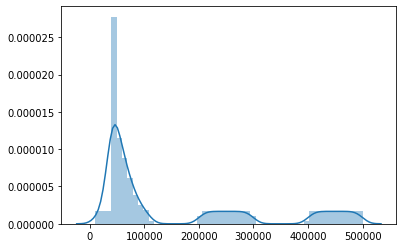

In [20]:
##Histogram to show the salary distribution among the employees

sns.distplot(spark.sql("select emp_no, salary from salaries").toPandas(),norm_hist = True)
plt.show()

In [21]:
##Bar graph to show the Average salary per title (designation)

Average_Salary = spark.sql("select avg(salaries.salary) as avgsalary, titles.title from employees inner join salaries on salaries.emp_no = employees.emp_no inner join titles on employees.emp_title_id= titles.title_id group by titles.title order by avgsalary").toPandas()
Average_Salary

,avgsalary,title
0,48506.799871,Senior Engineer
1,48535.336511,Engineer
2,48564.434447,Assistant Engineer
3,48582.896092,Technique Leader
4,51531.041667,Manager
5,58465.382850,Staff
6,58550.172704,Senior Staff


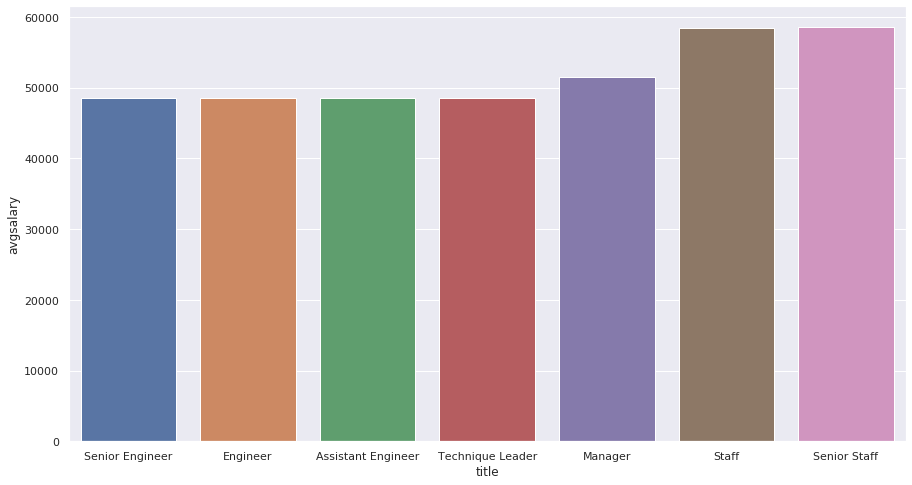

In [38]:
sns.barplot(x = Average_Salary.title,y = Average_Salary.avgsalary)
sns.set(rc={'figure.figsize':(16,8)})

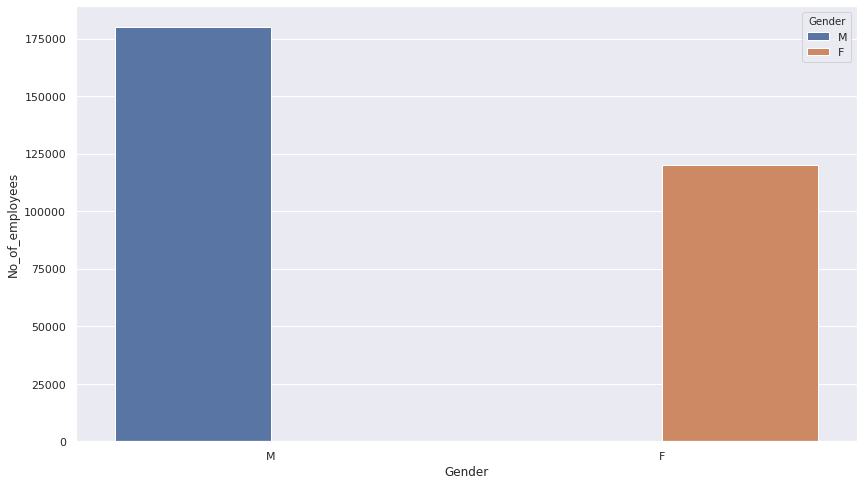

In [60]:
#gender based number of employees
Gender = spark.sql("select sex as Gender,count(sex) as No_of_employees from employees group by sex order by No_of_employees desc").toPandas()
ax = sns.barplot(x="Gender", y="No_of_employees", hue="Gender", data=Gender)

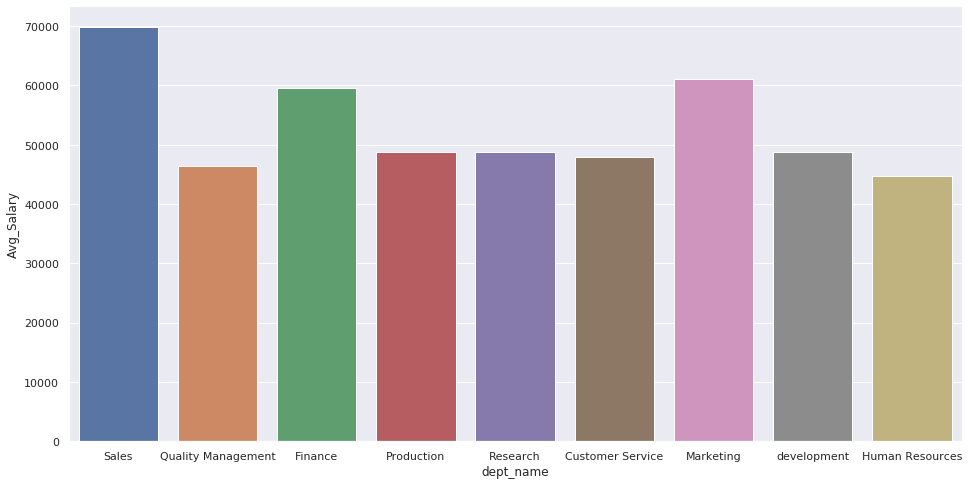

In [66]:
#average salary per department
Avg_Salary = spark.sql("select departments.dept_name, avg(salaries.salary) as Avg_Salary from departments inner join dept_emp on departments.dept_no = dept_emp.dept_no inner join employees on dept_emp.emp_no = employees.emp_no inner join  salaries on employees.emp_no=salaries.emp_no group by departments.dept_name").toPandas()
plt.rcParams['figure.figsize'] = (16,8)
sns.barplot(x='dept_name',y='Avg_Salary',data = Avg_Salary)

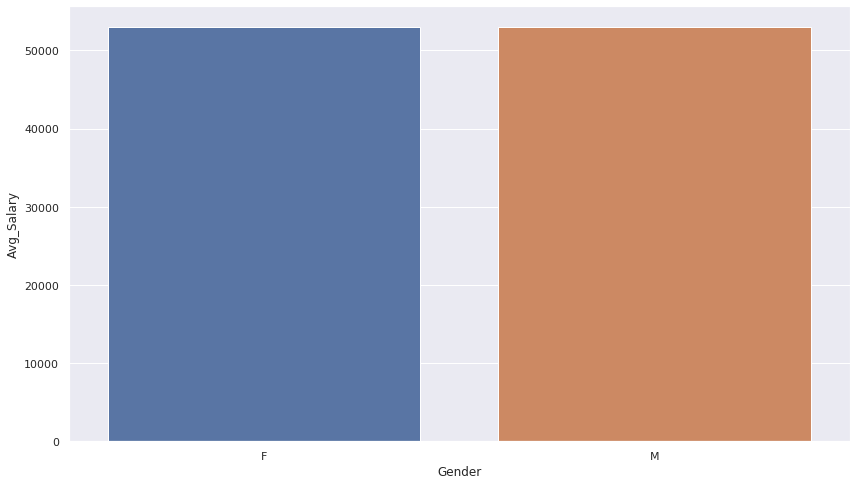

In [62]:
#average salary gender wise
gender_wise_average_salary = spark.sql("select employees.sex as Gender, avg(salaries.salary) as Avg_Salary from employees inner join salaries on employees.emp_no=salaries.emp_no group by employees.sex").toPandas()
plt.rcParams['figure.figsize'] = (14,8)
sns.barplot(x='Gender',y='Avg_Salary',data = gender_wise_average_salary )

# Machine learning

In [146]:
# importing all the necessary libraries
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.sql.functions import *
from pyspark.ml.feature import Imputer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [85]:
## dropping all the irrelevant columns for predicting the target variable
df = df_new.drop('emp_no', 'birth_date','first_name', 'last_name', 'hire_date', 'last_date','title_id')
df.show()

+-------+------------+---+--------------+-----------------------+-----+------------------+------+------------------+
|dept_no|emp_title_id|sex|no_of_projects|Last_performance_rating|left_|         dept_name|salary|             title|
+-------+------------+---+--------------+-----------------------+-----+------------------+------+------------------+
|   d005|       e0003|  M|             9|                      C| true|       development| 60117|   Senior Engineer|
|   d007|       s0001|  F|             8|                      B|false|             Sales| 65828|             Staff|
|   d004|       e0003|  M|             1|                      C|false|        Production| 40006|   Senior Engineer|
|   d004|       e0003|  M|             5|                      A|false|        Production| 40054|   Senior Engineer|
|   d003|       s0001|  M|             6|                      A|false|   Human Resources| 78228|             Staff|
|   d005|       e0003|  F|            10|                      B

In [155]:
df = spark.sql("select emp.sex,emp.no_of_projects,emp.Last_performance_rating,cast(emp.left_ as float),salaries.salary, dpt.dept_name from employees as emp \
                inner join dept_emp on emp.emp_no = dept_emp.emp_no \
                inner join departments as dpt on dept_emp.dept_no = dpt.dept_no \
                inner join titles on emp.emp_title_id = titles.title_id \
                inner join salaries on emp.emp_no = salaries.emp_no").persist()
df.show(10)

+---+--------------+-----------------------+-----+------+------------------+
|sex|no_of_projects|Last_performance_rating|left_|salary|         dept_name|
+---+--------------+-----------------------+-----+------+------------------+
|  M|             9|                      C|  1.0| 60117|       development|
|  F|             8|                      B|  0.0| 65828|             Sales|
|  M|             1|                      C|  0.0| 40006|        Production|
|  M|             5|                      A|  0.0| 40054|        Production|
|  M|             6|                      A|  0.0| 78228|   Human Resources|
|  F|            10|                      B|  0.0| 40000|       development|
|  F|             6|                      B|  1.0| 56724|          Research|
|  M|             9|                      C|  0.0| 46671|       development|
|  F|             8|                      B|  0.0| 60929|Quality Management|
|  F|             4|                      A|  0.0| 72488|Quality Management|

In [156]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- Last_performance_rating: string (nullable = true)
 |-- left_: float (nullable = true)
 |-- salary: integer (nullable = true)
 |-- dept_name: string (nullable = true)



In [157]:
##identifying the continuous and categorical variables
continuous_features = ['no_of_projects','salary']
                    
categorical_features = ['sex','Last_performance_rating','dept_name']

# String Indexer

In [158]:
df = StringIndexer(inputCol='sex', outputCol='sex_strindx').fit(df).transform(df)
df = StringIndexer(inputCol='Last_performance_rating', outputCol='Last_performance_rating_strindx').fit(df).transform(df)
df = StringIndexer(inputCol='dept_name', outputCol='dept_name_strindx').fit(df).transform(df)

# Vector Assembler

In [159]:
featureCols = continuous_features + ['sex_strindx', 'Last_performance_rating_strindx','dept_name_strindx'] 

In [160]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [161]:
df = assembler.transform(df)

# Train-Test Split

In [162]:
train_df, test_df = df.randomSplit( [0.7, 0.3], seed = 42)

# Model Building

In [163]:
rf_model = RandomForestClassifier(featuresCol="features",
                              labelCol="left_",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')
rf_model = rf_model.fit(train_df)

In [164]:
pred = rf_model.transform(test_df)
pred.show()

+---+--------------+-----------------------+-----+------+----------------+-----------+-------------------------------+-----------------+--------------------+--------------------+--------------------+----------+
|sex|no_of_projects|Last_performance_rating|left_|salary|       dept_name|sex_strindx|Last_performance_rating_strindx|dept_name_strindx|            features|       rawPrediction|         probability|prediction|
+---+--------------+-----------------------+-----+------+----------------+-----------+-------------------------------+-----------------+--------------------+--------------------+--------------------+----------+
|  F|             1|                      A|  0.0| 40000|Customer Service|        1.0|                            1.0|              3.0|[1.0,40000.0,1.0,...|[45.0227145405183...|[0.90045429081036...|       0.0|
|  F|             1|                      A|  0.0| 40000|Customer Service|        1.0|                            1.0|              3.0|[1.0,40000.0,1.0,...

In [168]:
def train(train, test, classifier):
    (train, test) = df.randomSplit([0.7,0.3])
    print(classifier)
    model = classifier.fit(train)

    pred = model.transform(test)

    eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="left_", predictionCol="prediction", metricName="accuracy"))

    eval_precision = (MulticlassClassificationEvaluator
        (labelCol="left_", predictionCol="prediction", metricName="weightedPrecision"))

    eval_recall = (MulticlassClassificationEvaluator
        (labelCol="left_", predictionCol="prediction", metricName="weightedRecall"))

    eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="left_", predictionCol="prediction", metricName="f1"))

    accuracy = eval_accuracy.evaluate(pred)

    precision =  eval_precision.evaluate(pred)

    recall =  eval_recall.evaluate(pred)

    f1 =  eval_f1.evaluate(pred)

    print(f"""
    Accuracy  = {accuracy}
    Error     = {1-accuracy}
    Precision = {precision}
    Recall    = {recall}
    F1        = {f1}""")

    return model, pred

In [169]:
rf_model2 = RandomForestClassifier(featuresCol="features",
                              labelCol="left_",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

In [170]:
_ , pred2 = train(train_df, test_df, rf_model2)

pred2.select("prediction", "left_", "features").show(10)

RandomForestClassifier_d1404c3f65cf

    Accuracy  = 0.901215775031546
    Error     = 0.09878422496845396
    Precision = 0.8121898731657101
    Recall    = 0.901215775031546
    F1        = 0.8543900001589603
+----------+-----+--------------------+
|prediction|left_|            features|
+----------+-----+--------------------+
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
|       0.0|  0.0|[1.0,40000.0,1.0,...|
+----------+-----+--------------------+
only showing top 10 rows



#### Accuracy for the model is 90%. So, we can conclude that the performance of model is good.

# Pipeline

In [171]:
# getting tables
df2 = spark.sql("select emp.sex,emp.no_of_projects,emp.Last_performance_rating,salaries.salary, dpt.dept_name from employees as emp \
                inner join dept_emp on emp.emp_no = dept_emp.emp_no \
                inner join departments as dpt on dept_emp.dept_no = dpt.dept_no \
                inner join titles on emp.emp_title_id = titles.title_id \
                inner join salaries on emp.emp_no = salaries.emp_no").persist()

# dropping irrelevant columns
df2 = df2.drop('emp_no', 'first_name', 'last_name', 'birth_date', 'hire_date', 'last_date', 'emp_title_id')

# Vector Assembler
Vect_InpCol = ['sex_strindx', 'Last_performance_rating_strindx', 'dept_name_strindx', 'salary']

# setting label column
df2 = df2.withColumnRenamed('left_','label')

# Staging

In [173]:
# String Indexer
sex_indexer = StringIndexer(inputCol='sex', outputCol='sex_strindx')
Last_performance_rating_indexer = StringIndexer(inputCol='last_performance_rating', outputCol='Last_performance_rating_strindx')
dept_name_indexer = StringIndexer(inputCol='dept_name', outputCol='dept_name_strindx')

# Vector Assembler
assembler = VectorAssembler(inputCols = Vect_InpCol, outputCol = "features")

# ML Model
rf_model = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

# Creating Pipeline
pipeline = Pipeline(stages= [sex_indexer, Last_performance_rating_indexer, dept_name_indexer, assembler, rf_model])